# ACF Plotting Activity
## DS150 Time Series Analysis

*Tandogon, Zen Adrian* | *DS150* | *01/03/2024*

### Instructions

Perform the given tasks as described on each item using only the given libraries below.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

#### 1. Create a Random Walk Time Series from `numpy` with given specifications

The random walk should be:
- A set seed of `337` is given
- A random number generator `MT19937` should be used
- The data point starts at 100
- Simulate a coin flip: If it lands heads, add 1 to the previous data point, otherwise subtract 1 to the previous data point
- Append the result at the end of the series
- Repeat the process 500 times

Plot the given result and its ACF plot using `numpy`.

In [22]:
MT19937 = np.random.MT19937(337)
rng = np.random.default_rng(MT19937)

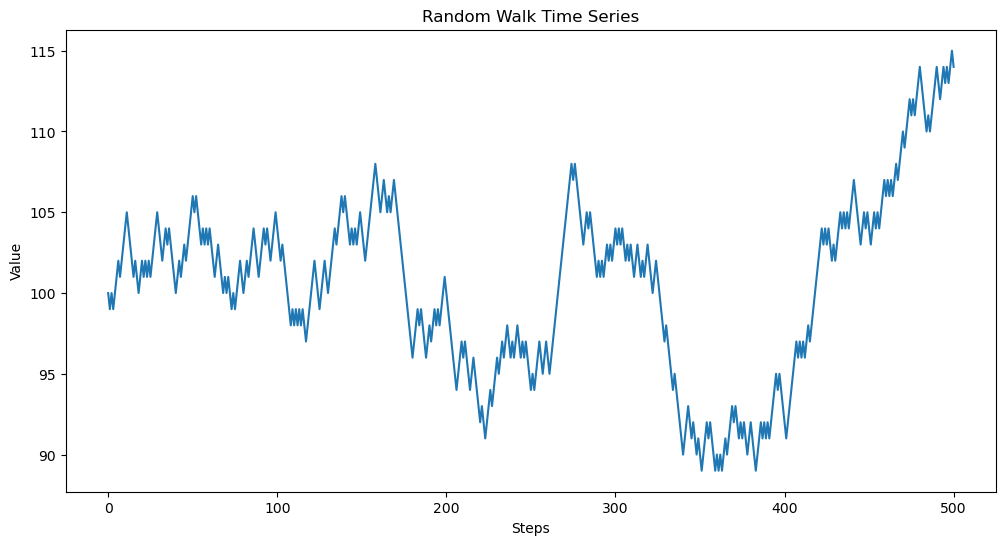

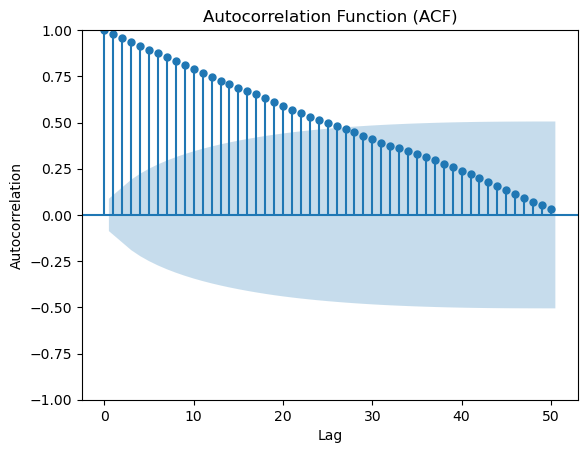

In [23]:
n_steps = 500
start = 100
random_walk = [start]

# Generate random walk
for _ in range(n_steps):
    step = 1 if np.random.randint(0, 2) == 1 else -1
    random_walk.append(random_walk[-1] + step)

# Plot the random walk
plt.figure(figsize=(12, 6), facecolor='white')
plt.plot(random_walk)
plt.title('Random Walk Time Series')
plt.xlabel('Steps')
plt.ylabel('Value')
plt.show()

# Plot the ACF
plot_acf(random_walk, lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

#### 2. Using the given data, decompose the given data and plot its ACF

The data is given in the variable `elec_consumption`

Perform the given tasks:
- Get the 1st differencing using the column `IPG2211A2N`
- Using the differenced value, show an ACF plot using `statsmodels`
- Get the 4th differencing using the column `IPG2211A2N`
- Using the newly differenced value, show an ACF plot using `statsmodels`

In [4]:
elec_consumption = pd.read_csv('https://raw.githubusercontent.com/ejgao/Time-Series-Datasets/master/Electric_Production.csv')
elec_consumption.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


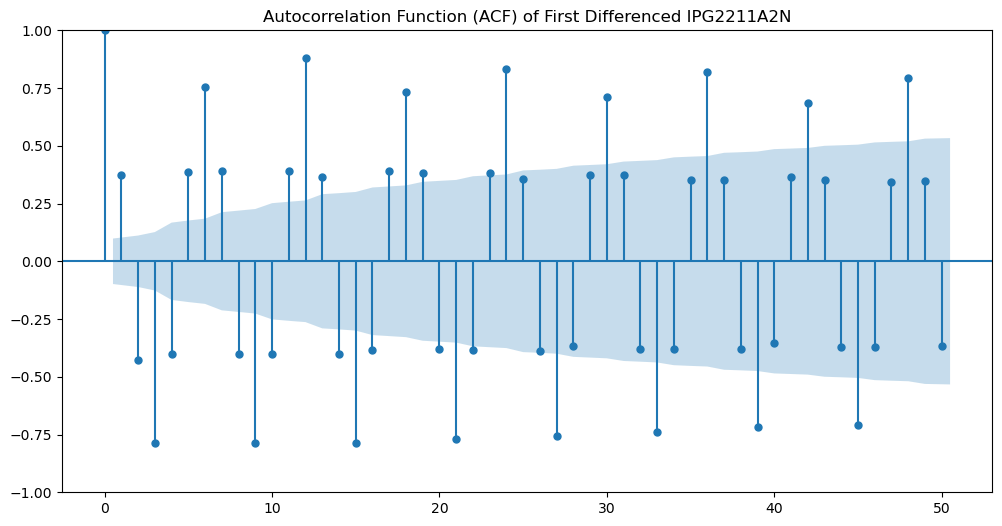

In [17]:
elec_consumption = pd.read_csv('https://raw.githubusercontent.com/ejgao/Time-Series-Datasets/master/Electric_Production.csv')
elec_consumption['DATE'] = pd.to_datetime(elec_consumption['DATE'])
elec_consumption.set_index('DATE', inplace=True)
elec_consumption['IPG2211A2N_diff1'] = elec_consumption['IPG2211A2N'].diff()
elec_consumption.dropna(inplace=True)
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(elec_consumption['IPG2211A2N_diff1'], ax=ax, lags=50)
ax.set_title('Autocorrelation Function (ACF) of First Differenced IPG2211A2N')
plt.show()

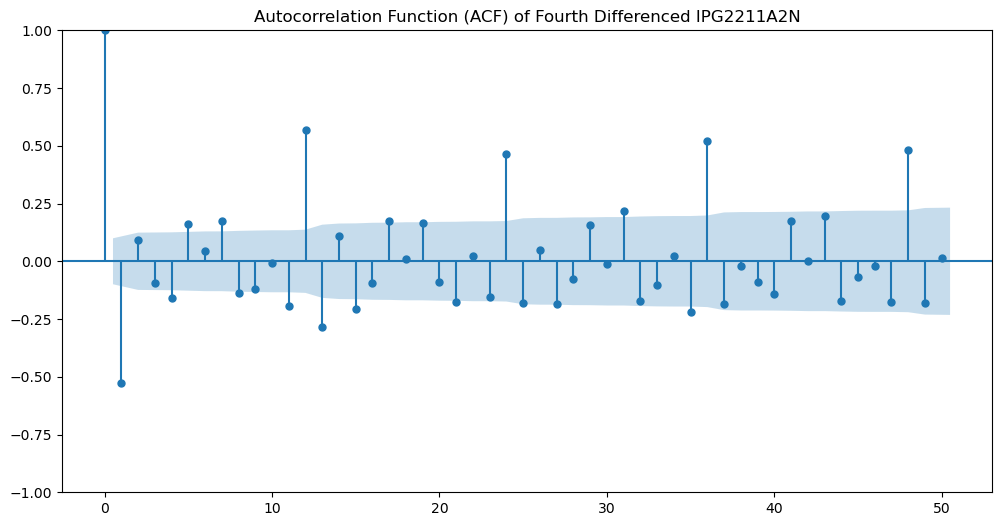

In [24]:
elec_consumption['IPG2211A2N_diff4'] = elec_consumption['IPG2211A2N'].diff().diff().diff().diff()

elec_consumption.dropna(inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(elec_consumption['IPG2211A2N_diff4'], ax=ax, lags=50)
ax.set_title('Autocorrelation Function (ACF) of Fourth Differenced IPG2211A2N')
plt.show()